### Pandas 데이터 csv로 출력하기

In [8]:
import pandas as pd
import numpy as np

In [9]:
data = {
    "c1": [1, 2, "누락"],
    "c2": [1.11, "", 3.33],
    "c3": ["one", "two", "three"],
}
df_csv = pd.DataFrame(data)     
df_csv

,c1,c2,c3
0,1,1.11,one
1,2,,two
2,누락,3.33,three


- 데이터를 csv파일로 출력할 땐 to_csv() 메서드를 활용
- 첫 인자로 파일 경로를 입력
- (현재 만든 DataFrame의 index는 의미 없는 값이라 출력할 때 배제)
- to_csv()의 기본값 인자 : index의 default가 True니 index = False키워드 활용 해 설정

- df_csv.to_csv("파일이름 및 확장자", index = False) 와 같이 사용
- notevook_dir 로 설정한 C:\python 경로에 해당 파일 생성되었는지 확인

In [10]:
df_csv.to_csv('samplel.csv', index = False, encoding = 'UTF-8') # 글자깨지면 UTF- 8

- CSV 파일로부터 데이터를 읽어 DataFrame을 만들 때 pandas.read_csv 함수 사용
- 첫 번째 인수로 '파일 이름.확장자' 문자열로 씀.

- 읽은 데이터에 column인덱스는 있지만 row 인덱스 정보가 없으므로
- ------ >0 부터 시작하는 정수 인덱스가 자동으로 추가된 것 확인

In [11]:
df_read = pd.read_csv('samplel.csv')
df_read

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


- column 인덱스를 배제하고 저장해 보자
- header - False 키워드 인수 추가
- 파일명 'sample2.csv'로 지정 (column인덱스가 없는지 파일 열어 확인하기)

In [12]:
df_csv.to_csv('sample2.csv', index = False, header = False)

- column 인덱스 정보가 없는경우 : read_csv() names 키워드 인수 활용해 설정
- 데이터 불러올 때 names 키워드 통해 column 인덱스 정보 직접 추가

In [13]:
pd.read_csv('sample2.csv',names = ['c1','c2','c3'])

,c1,c2,c3
0,1,1.11,one
1,2,NaN,two
2,누락,3.33,three


#### 콤마로 구분되지 않은 텍스트 파일 처리
- jupyter lab에서 매직 명령어인 ' %%writefile 파일명 ' (공백없음)을 사용해 파일 저장

In [14]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample3.txt


- 데이터를 구분하는 구분자(separator)가 콤마(comma)가 아니면 sep 인수를 써서 구분자를 사용자가 지정해줘야 함
- 길이가 정해지지 않은 공백이 구분자인 경우 -> '\s+'정규식(regular expression) 문자열 사용

In [15]:
pd.read_table('sample3.txt',sep= '\s+')

,c1,c2,c3,c4
0,0.179181,-1.538472,1.347553,0.43381
1,1.024209,0.087307,-1.281997,0.49265
2,0.417899,-2.002308,0.255245,-1.10515


In [16]:
%%writefile sample4.txt
파일 제목: sample4.txt
데이터 포맷의 설명:
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample4.txt


- 데이터로 불러올 자료파일 중 건너 뛰어야 할 상단 row가 있으면 skiprows 인수를 사
- 건너 뛸 줄은 리스트 안에 작성 (리스트가 아닌 range(2)를 활용할 수 있음)

In [17]:
pd.read_csv('sample4.txt',skiprows = [0,1])

,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


- 데이터로 불러올 자료 안 특정하 값을 NaN으로 취급하고 싶으면 na_values이누에 NaN값으로 취급할 값을 넣음

In [18]:
df_na_val = pd.read_csv('samplel.csv',na_values = ['누락'])
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


- 파일 읽을 때와 마찬가지로 파일 출력할 때 sep인수로 구분자를 바꿀 수 있음

In [19]:
df_na_val.to_csv('sample5.txt', sep='|')

- 저장할 때도 na_rep 키워드 인수를 사용해 NaN표시값을 바꿀 수 있음.
- NaN값을 '누락'으로 변경 해 저장

In [20]:
df_na_val

,c1,c2,c3
0,1.0,1.11,one
1,2.0,NaN,two
2,NaN,3.33,three


In [21]:
df_na_val.to_csv('sample6.csv',na_rep='누락')     ######

### 온라인의 csv 파일 가져오기
- 웹상에 다양한 데이터 파일이 csv파일 형태로 제공
- read_csv 명령 사용시 path 대신 URL을 지정하면 Pandas가 직접 해당 파일 다운로드해 읽음
- 웹사이트에 저자되어 있는 데이터 파일을 원격으로 읽는 명령 예제

- 이 DataFrame은 실제로 데이터개수, row(행)의 수가 627개가 넘는 데이터
- 데이터 수가 많아 한번에 출력이 안 될 경우, DataFrame의 표현(repressentation)은 데이터 앞, 뒤의 일부분만 보여줌

In [45]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


- 앞이나 뒤의 특정 개수만 보고 싶으면 head()메서드나 tail()메서드를 사용
- 메서드 인수로 출력할 row의 수 넣으면 됨

In [46]:
titanic.head(20)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


## DataFrame 고급인덱싱


### loc 인덱서 (인덱싱, 슬라이싱 가능)
- dataFrame에서 특정한 데이터만 골라내는 것을 인덱싱(indexing)이라고 함.
- column에 대해 label, label list 인덱싱을, 
- row에 대해 index(정수)슬라이스 총 3가지 방식을 사용해 데이터를 추출

- Pandas는 NumPy 배열과 같이 콤마(,)를 사용한 (row인덱스, column인덱스)형식의 
- 2차원 인덱싱을 지원하기 위해 특별한 인덱서(indexer)속성 제공

1. loc : label 값 기반의 2차원 인덱싱
2. iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱

- df.loc[row 인덱싱 값]
- df.loc[row 인덱싱 값, column 인덱싱 값]

- row 인덱싱 값은 정수 or row index데이터. 
- column 인덱싱 값은 label 문자열
1. index 데이터
2. index 데이터 슬라이스
3. index 데이터 리스트
4. 같은 row 인덱스를 가지는 boolean Sries (row인덱싱의 경우)
5. 또는 위의 값들을 반환하는 함수

In [47]:
# data = {
#     "c1": [1, 2, "누락"],
#     "c2": [1.11, " ", 3.33],
#     "c3": ["one", "two", "three"],
#     " ": ["0", "1", "2"],
# }
# columns = [" ", "c1", "c2", "c3"]
# index = [" ", " ", " "]
# df = pd.DataFrame(data, index=index, columns=columns)     
# df

In [48]:
ind = np.arange(10,22).reshape(3,4)

data = pd.DataFrame(ind, index=[n for n in 'abc' ], columns=[x for x in 'ABCD'])
data

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


- loc 인덱서를 사용하면서 인덱스를 콤마없이 하나만 넣으면 row를 선택
- 인덱스 데이터가 'a'인 행을 고르면 해당하는 row가 Series로 반환.
- Series라서 상하로 길게 표현되기는 했지만 row를 가져옴

In [49]:
data.loc['a']

A    10
B    11
C    12
D    13
Name: a, dtype: int32

인덱스 데이터의 슬라이스도 가능
loc를 쓰지 않을 때와 결과가 같음

In [50]:
data.loc['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [51]:
data['b':'c']

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


- 인덱스 데이터의 리스트 자료형도 사용 가능.
- 이 때는 loc를 쓰지 않으면 KeyError 오류가 발생함.

In [52]:
data.loc[['b','c']]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


- Boolean Series로 row를 기준으로 인덱싱 가능
- data.A(영어 문자열은 속성처럼 접근가능. 값중 15 초과인 결과를 Boolean Series값을 얻을 수 있다

In [53]:
data.A > 15             #### 영문자 column에 대해서만 가능

a    False
b    False
c     True
Name: A, dtype: bool

In [54]:
data.loc[data.A > 15]           ### True값만 가지는 행을 가지고 옴

,A,B,C,D
c,18,19,20,21


- callable한 함수를 만들어서 인덱싱하는데 사용할 수 있음.
- Acolumn의 값이 10보다 큰 row만 선택

In [55]:
def select_rows(data,num):
    return data.A > num   # num은 식을 전달

select_rows(data, 10)

a    False
b     True
c     True
Name: A, dtype: bool

In [56]:
data.loc[select_rows(data,10)]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


- loc 인덱서는 column label 인덱싱이나 column label 리스트 인덱싱은 불가능
- 맨 앞에 row값이 나와야 한다
- column으로 접근할 수 없다

- (주의사항) row 인덱스 값이 아래의 예제 처럼 default로 주어지는 정수로 생성된 
- DataFrame의 경우에는 슬라이싱 마지막 숫자가 포함된 결과를 가져옴
- loc는 label index에 접근한다고 했기 때문이다.

- row 인덱스 값이 정수인 경우에는 마지막 값이 포함

In [57]:
df2 = pd.DataFrame(np.arange(10,26).reshape(4,4), columns = ['A','B','C','D'])
df2

,A,B,C,D
0,10,11,12,13
1,14,15,16,17
2,18,19,20,21
3,22,23,24,25


### DataFrame 고급 인덱싱 - loc 인덱서 vs iloc 인덱서
- iloc은 loc과는 다르게 label 인덱스가 아닌 숫자로된 인덱스에 접근하기에
- 슬라이싱 방식과 동일하게 포함하지 않는다.

In [58]:
df2.loc[1:2]        # loc > label을 보고 포함
                    # iloc  intindex를 보고 불포함
                    #슬라이싱 마지막의것

,A,B,C,D
1,14,15,16,17
2,18,19,20,21


In [59]:
df2.iloc[1:2]

,A,B,C,D
1,14,15,16,17


- 인덱싱 값을 row와 column으로 모두 받으려면 df.loc[row 인덱스, column 인덱스]와 같은 형태로 사용
- row 인덱스 label값이 a, column 인덱스 label값이 A인 위치의 값을 구하는 것은 다음과 같다.

In [60]:
data.loc['a','A']

10

- 콤마(,)로 구분된 인덱싱 값으로 label 데이터 슬라이싱 or 리스트도 사용할 수 있다

In [61]:
data.loc['b':,'A']

b    14
c    18
Name: A, dtype: int32

In [62]:
data.loc['a',:]

A    10
B    11
C    12
D    13
Name: a, dtype: int32

In [63]:
data.loc[['a','b'],['B','D']]

,B,D
a,11,13
b,15,17


- row 인덱스가 같은 boolean Series나 이러한 boolean Series를 반환하는 함수도 row의 인덱싱 값이 될 수 있다

In [64]:
data.loc[data.A > 10, ['C','D']]

,C,D
b,16,17
c,20,21


### iloc 인덱서 
- iloc 인덱서는 loc 인덱서와 반대로 label이 아니라 순서를 나타내는 정수(integer) 인덱스만 받는다

In [65]:
data.iloc[0,1]

11

In [66]:
data.iloc[:2,2]

a    12
b    16
Name: C, dtype: int32

In [67]:
data.iloc[0,-2:]

C    12
D    13
Name: a, dtype: int32

In [68]:
data.iloc[2:3, 1:3]

,B,C
c,19,20


- loc 인덱서와 마찬가지 인덱스가 하나만 들어가면 row을 선택합니다.

In [70]:
data.iloc[-1] = data.iloc[-1]*2
data

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,36,38,40,42


## Series 데이터 개수 세기

- pandas는 NumPy 2차원 배열에서 가능한 대부분의 데이터 처리가 가능
- 데이터 처리 및 변환을 위한 다양한 함수와 메서드를 제공
- 가장 간단한 데이터 분석은 데이터의 개수를 세는 것.
- 개수를 셀 때는 count() 메서드 사용
- 이럴때는 NaN 값을 세지 않음

In [132]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [133]:
s.count()

9

In [134]:
len(s)

10

- DataFrame 객체에 count()메서드를 사용하면 각 column마다의 데이터 개수를 셉니다
- 그 결과를 Series로 반환합니다. count()메서드는 NaN값을 제외하고 개수를 세기 때문에
- 데이터에서 값이 누락된 부분(NaN)을 찾을 때 유용합니다.

In [136]:
np.random.seed(2)
da = pd.DataFrame(np.random.randint(5, size = (4,4)), dtype = float)
da.iloc[2,3] = np.nan
da

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [137]:
da.count()

0    4
1    4
2    4
3    3
dtype: int64

- 데이터 시각화 수업에 seaborn이라는 패키지를 제공하고 있다
- 타이타닉호의 승객 데이터도 있는데 아래의 예제 처럼 DataFrame으로 읽어올 수 있다
- 이 명령을 싱행하려면 당연히 seaborn 패키지가 설치되어 있어야 한다 (anaconda는 seaborn을 함께 설치)

In [190]:
import seaborn as sns         # seaborn (데이터 시각화)

titanic = sns.load_dataset('titanic')
titanic.head(5) # 데이터 중 앞의 5개를 본다

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [191]:
# Q 타이타닉호 승객 데이터를 seaborn패키지를 통해 불러오고 그 데이터 개수를 각 column마다 구해봐라

titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

- Series 값이 정수, 문자열, 카테고리 값인 경우에는 value_counts()메서드로 각각의 값이 나온 횟수를 셀 수 있다.

In [144]:
np.random.seed(1) 
s2 = pd.Series(np.random.randint(6, size = 100))      #0 ~ 5 사이의 정수를 100회 생성하고 있음.
s2.tail()        

95    4
96    5
97    2
98    4
99    3
dtype: int32

In [147]:
s2.value_counts()   # Series 객체 내에 인덱스별로 나온 횟수를 보여줌

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

- DataFrame에는 value_counts 메서드(cersion 1.1부터 사용가능) 
사용 가능하고 첫 인자로 label값을 문자로 전달해도 된다

In [159]:
np.random.seed(2)
da = pd.DataFrame(np.random.randint(5, size = (4,4)), dtype = float)
da.iloc[2,3] = np.nan
da

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [160]:
da[0].value_counts()

3.0    2
0.0    1
4.0    1
Name: 0, dtype: int64

In [161]:
s2.value_counts()

1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

### Series 정렬 - index 기준
- sort_index를 적용하면 아래와 같이 정렬된 결과를 볼 수 있다

In [162]:
s2.value_counts().sort_index()

0    18
1    22
2    13
3    14
4    17
5    16
dtype: int64

value 기주

- value를 기준으로 정렬할 때 NaN값이 있는 경우가 있을 수 있다.
- 이 경우에는 정렬하면 아래 예제와 같이 NaN값이 가장 나중으로 위치하게 된다.

In [165]:
s = pd.Series(range(10))
s[3] = np.nan
s

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [166]:
s.sort_values()

0    0.0
1    1.0
2    2.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
3    NaN
dtype: float64

### Series정렬 - 내림차순
- 큰수에서 작은 술, 내림차순으로 정렬하려면 ascending = False와 같이 키워드 인수 지정

In [167]:
s.sort_values(ascending = False)

9    9.0
8    8.0
7    7.0
6    6.0
5    5.0
4    4.0
2    2.0
1    1.0
0    0.0
3    NaN
dtype: float64

- DataFrame에서 sort_values 메서드를 사용하려면 by 키워드 인수를 활용하여 
- DataFrame의 정렬 기준이 되는 column을 지정해 주어야 한다.

In [171]:
da.sort_values(by = 1)       # DataFrame은 테이블 형태이므로 1개. column만 정렬하는 것이 아닌 
                             # 1개 column을 기준으로 다른 column도 정렬한다

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


- by 키워드 인수에 전달할 값으로 리스트 자료형의 형태로 지정 가능
- 요소의 순서대로 정렬기준의 우선순위가 됨
- 리스트의 첫번째 열을 기준으로 먼저 정렬 -> 동일한 순서 값이 나오면 그 다음 기준으로 순서 결정

In [174]:
da.sort_values(by=1)

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [173]:
da.sort_values(by = [1,2])      # 1번째 column을 기준으로 먼저 정렬하고
                                # 2번째 column을 기준으로 정렬

,0,1,2,3
1,3.0,0.0,2.0,1.0
0,0.0,0.0,3.0,2.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [71]:
import seaborn as sns         # seaborn (데이터 시각화)

titanic = sns.load_dataset('titanic')
titanic.head(5) # 데이터 중 앞의 5개를 본다

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
#성별 인원수
sex = titanic['sex']
sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [73]:
age = titanic['age']
age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [74]:
titanic['class'].value_counts().sort_values(ascending = False)

Third     491
First     216
Second    184
Name: class, dtype: int64

In [75]:
titanic['alive'].value_counts().sort_values(ascending = False)

no     549
yes    342
Name: alive, dtype: int64

- 없어지는 방향의 축(0 = row, column)

In [76]:
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10,size=(4,8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [77]:
df2.sum(axis = 1)

0    35
1    34
2    41
3    42
dtype: int64

In [78]:
df2['RowSum'] = df2.sum(axis = 1)
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [79]:
df2.loc['ColTotal2'] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal2,24,33,25,24,15,10,5,16,152


In [80]:
df2.sum()

0          48
1          66
2          50
3          48
4          30
5          20
6          10
7          32
RowSum    304
dtype: int64

In [81]:
df2.loc['ColTotal2',:] = df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
ColTotal2,48,66,50,48,30,20,10,32,304


In [82]:
df2.mean()

0         14.4
1         19.8
2         15.0
3         14.4
4          9.0
5          6.0
6          3.0
7          9.6
RowSum    91.2
dtype: float64

In [346]:
df2.loc['ColTotal2',:] = df2.mean()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.00,8.00,9,5.00,0.0,0.0,1.0,7.00,35.00
1,6.00,9.00,2,4.00,5.0,2.0,4.0,2.00,34.00
2,4.00,7.00,7,9.00,1.0,7.0,0.0,6.00,41.00
3,9.00,9.00,7,6.00,9.0,1.0,0.0,1.00,42.00
ColTotal2,12.48,17.16,13,12.48,7.8,5.2,2.6,8.32,79.04


In [347]:
import seaborn as sns         # seaborn (데이터 시각화)

titanic = sns.load_dataset('titanic')
titanic.head(5) # 데이터 중 앞의 5개를 본다

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [348]:
# 타이타닉호 승객의 평균나이를 구하시오
round(titanic['age'].mean(),1)

29.7

In [349]:
# 타이타닉호 여성 승객의 평균나이를 구하시오
round(titanic[titanic['sex'] == 'female']['age'].mean(),1)

27.9

In [343]:
# 타이타닉호 승객중 1등실 선실의 여성 승객의 평균나이를 구하시오
round(titanic[(titanic['pclass'] == 1) & (titanic['sex'] == 'female')]['age'].mean(),1)

34.6

In [30]:
class Team:
    """팀 객체를 만듭니다."""
    # 클래스 속성
    count = 0 # Team 클래스로부터 초기화된 인스턴스 개수
    order = []
    def __init__(self, number, name=None):
        self.number = number
        self.name = name
        self.__member = set()
        Team.count += 1
    def add_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            print(f"{name} 님은 이미 팀에 있습니다.")
            return
        # 해당 이름이 팀에 없을 경우
        else:
            self.__member.add(name)
            print(f"{name} 님을 {self.number} 팀에 추가했습니다.")
    def rm_member(self, name):
        # 해당 이름이 팀에 있을 경우
        if name in self.__member:
            self.__member.discard(name)
            print(f"{name} 님을 {self.number} 팀에서 삭제했습니다.")
        # 해당 이름이 팀에 없을 경우
        else:
            print(f"{name} 님은 해당 팀에 없습니다.")
    def get_member(self):
        return self.__member
    def get_count(self):
        return self.count
    def get_order(self):
        return self.order
    def set_order(self, number):
        if number in self.order:
            self.order.remove(number)
        self.order.append(number)
    # 내장 함수(Built-in function) len(Team()) --> 파이썬이 __len__(self)를 찾아서 실행
    def __len__(self):
        return len(self.__member)

In [31]:
import random
# class TeamBuilder:
#     has_team = False
#     teams = []
    
#     def __init__(self, members, team_count):
#         self.members = members
#         self.team_count = team_count   
    
#     def create_team(self,members):
#         self.team_count += 1
#         if has_team == True:
#             return
#         else:
#             team_count.random(1,5)
        
#     def show_team_info(self):
#         pass #print(f'{}팀은 {}입니다._')
        

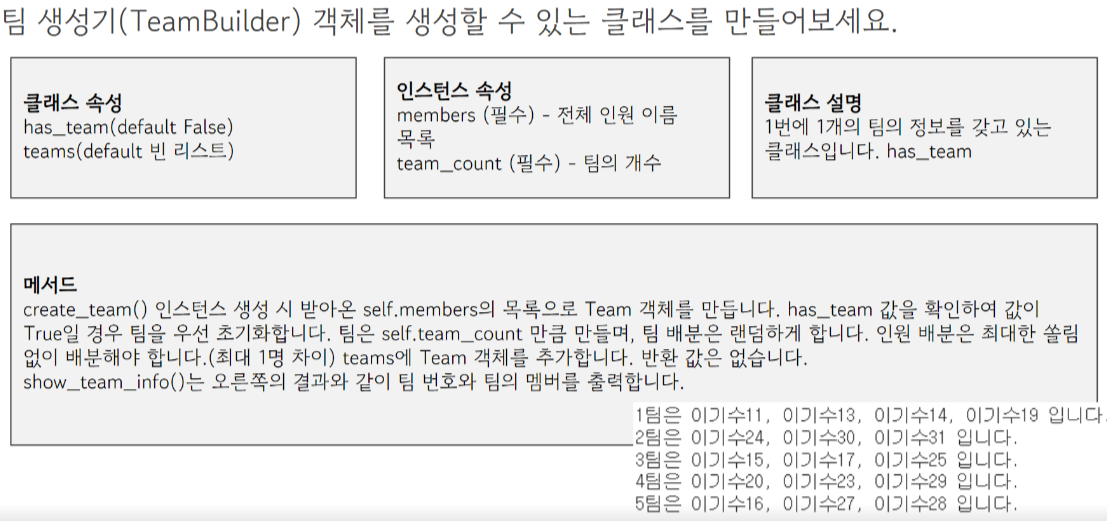

In [32]:
import numpy as np
class TeamBuilder:
    # 기존에 팀이 생성된 적이 있는지 확인하는 용도로 씀
    has_team = False
    # Team 객체를 담는 변수
    teams = []
    def __init__(self, members, team_count):
        # 이름들을 갖는 리스트
        self.members = members
        # 몇개의 팀이 만들 것인지
        self.team_count = team_count
    def create_teams(self):
        """팀을 구성할 때 랜덤하게 하고, 또 팀 간의 인원차이를 최소화"""
        if TeamBuilder.has_team == True:
            print("기존의 팀 정보를 지우고 새로 생성합니다.")
            TeamBuilder.teams.clear()
        # 몫, 나머지를 먼저 구한다.
        # 나머지 값이 있는 동안은 팀의 크기를 +1만큼 증가시킨다.
        # 팀 사이즈를 정해놓고 그만큼씩 Team 객체에 할당해주는 방식입니다.
        _q, _r = divmod(len(self.members), self.team_count)
        for _ in range(self.team_count):
            _team_size = _q
            if _r > 0:
                _team_size += 1
                _r -= 1
            _team_member = np.random.choice(self.members, size=_team_size, replace=False)
            _team = Team(_ + 1)
            for _member in _team_member:
                _team.add_member(_member)
                self.members.remove(_member)
            TeamBuilder.teams.append(_team)
        TeamBuilder.has_team = True
        print(f"팀을 {self.team_count}개 생성했습니다.")
    def show_team_info(self):
        for _ in range(self.team_count):
            print(f"{self.teams[_].number}팀은 {', '.join(sorted(self.teams[_].get_member()))} 입니다.")
    def __repr__(self):
        return f"<TeamBuilder {hex(id(TeamBuilder))}>"


In [33]:
tb = TeamBuilder("강지인 김강직 김경목 김기훈 김민수 "
                 "김예린 김유림 김호영 도강현 맹지호 "
                 "민병창 서영호 신제우 우상욱 윤규헌 "
                 "이민호 이병호 이선주 이호진 허경모 황도희".split(), 7)

In [34]:
tb.create_teams()

맹지호 님을 1 팀에 추가했습니다.
서영호 님을 1 팀에 추가했습니다.
김기훈 님을 1 팀에 추가했습니다.
김강직 님을 2 팀에 추가했습니다.
이선주 님을 2 팀에 추가했습니다.
김경목 님을 2 팀에 추가했습니다.
김민수 님을 3 팀에 추가했습니다.
김호영 님을 3 팀에 추가했습니다.
강지인 님을 3 팀에 추가했습니다.
우상욱 님을 4 팀에 추가했습니다.
신제우 님을 4 팀에 추가했습니다.
이호진 님을 4 팀에 추가했습니다.
이민호 님을 5 팀에 추가했습니다.
김유림 님을 5 팀에 추가했습니다.
김예린 님을 5 팀에 추가했습니다.
윤규헌 님을 6 팀에 추가했습니다.
허경모 님을 6 팀에 추가했습니다.
도강현 님을 6 팀에 추가했습니다.
민병창 님을 7 팀에 추가했습니다.
이병호 님을 7 팀에 추가했습니다.
황도희 님을 7 팀에 추가했습니다.
팀을 7개 생성했습니다.


In [35]:
tb.show_team_info()

1팀은 김기훈, 맹지호, 서영호 입니다.
2팀은 김강직, 김경목, 이선주 입니다.
3팀은 강지인, 김민수, 김호영 입니다.
4팀은 신제우, 우상욱, 이호진 입니다.
5팀은 김예린, 김유림, 이민호 입니다.
6팀은 도강현, 윤규헌, 허경모 입니다.
7팀은 민병창, 이병호, 황도희 입니다.


In [36]:
tb = TeamBuildr("강지인 김강직 김경목 김기훈 김민수"
                "김예린 김유림 김호영 도강현 맹지호"
                "민병창 서영호 신제우 우상욱 윤규헌"
                "이민호 이병호 이선주 이호진 허경모 황도희".split().5)

SyntaxError: invalid syntax (2223326934.py, line 4)

In [42]:
# 방식2
import numpy as np
class TeamBuilder:
    has_team = False
    teams = []
    def __init__(self, members, team_count):
        self.members = members
        self.team_count = team_count
    def create_teams(self):
        if TeamBuilder.has_team == True:
            print("기존의 팀 정보를 지우고 새로 생성합니다.")
            TeamBuilder.teams.clear()
        # 팀을 만들 순서를 랜덤하게 만듭니다.
        np.random.shuffle(self.members)
        # 팀 객체를 팀이 필요한 크기만큼 만들어서 클래스 속성인 teams에 추가합니다.
        TeamBuilder.teams.extend( [ Team(_ + 1) for _ in range(self.team_count) ] )
        # members에 값이 있을 때까지 반복하면서 만들어 놓은 Team 객체에 접근하면서 값을 할당합니다.
        i = 0
        while self.members:
            # 각 팀마다 1명씩 추가하는 방식입니다.
            # 추가한 members에 대한 요소는 사용되고 members 리스트에서 제거합니다.
            TeamBuilder.teams[i].add_member(self.members.pop())
            i += 1
            if i == self.team_count:
                i = 0
        print(f"팀을 {self.team_count}개 생성했습니다.")
    def show_team_info(self):
        for _ in range(self.team_count):
            print(f"{self.teams[_].number}팀은 {', '.join(sorted(self.teams[_].get_member()))} 입니다.")
    def __repr__(self):
        return f"<TeamBuilder {hex(id(TeamBuilder))}>"

In [43]:

tb = TeamBuilder("강지인 김강직 김경목 김기훈 김민수 "
                 "김예린 김유림 김호영 도강현 맹지호 "
                 "민병창 서영호 신제우 우상욱 윤규헌 "
                 "이민호 이병호 이선주 이호진 허경모 황도희".split(), 7)


In [44]:
tb.create_teams()

맹지호 님을 1 팀에 추가했습니다.
김경목 님을 2 팀에 추가했습니다.
김호영 님을 3 팀에 추가했습니다.
김기훈 님을 4 팀에 추가했습니다.
이호진 님을 5 팀에 추가했습니다.
김예린 님을 6 팀에 추가했습니다.
김강직 님을 7 팀에 추가했습니다.
강지인 님을 1 팀에 추가했습니다.
이선주 님을 2 팀에 추가했습니다.
김유림 님을 3 팀에 추가했습니다.
민병창 님을 4 팀에 추가했습니다.
황도희 님을 5 팀에 추가했습니다.
윤규헌 님을 6 팀에 추가했습니다.
도강현 님을 7 팀에 추가했습니다.
김민수 님을 1 팀에 추가했습니다.
서영호 님을 2 팀에 추가했습니다.
우상욱 님을 3 팀에 추가했습니다.
이병호 님을 4 팀에 추가했습니다.
허경모 님을 5 팀에 추가했습니다.
신제우 님을 6 팀에 추가했습니다.
이민호 님을 7 팀에 추가했습니다.
팀을 7개 생성했습니다.


In [45]:
tb.show_team_info()

1팀은 강지인, 김민수, 맹지호 입니다.
2팀은 김경목, 서영호, 이선주 입니다.
3팀은 김유림, 김호영, 우상욱 입니다.
4팀은 김기훈, 민병창, 이병호 입니다.
5팀은 이호진, 허경모, 황도희 입니다.
6팀은 김예린, 신제우, 윤규헌 입니다.
7팀은 김강직, 도강현, 이민호 입니다.
